# TSAD Benchmark Visualizations
This notebook visualizes the results of the Time Series Anomaly Detection (TSAD) benchmark.
It loads the results from `results/run_1.json` and compares the models across three key ranking metrics:
1. **AUC-ROC**: Area Under the Receiver Operating Characteristic Curve.
2. **PR-AUC**: Area Under the Precision-Recall Curve.
3. **Top-K Hit Rate**: Fraction of top-ranked anomalies that are true anomalies.

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

results_path = 'results/run_1.json'

if os.path.exists(results_path):
    with open(results_path, 'r') as f:
        data = json.load(f)
    print(f"Loaded {len(data)} results from {results_path}")
else:
    print(f"File not found: {results_path}")
    data = []

df = pd.DataFrame(data)

df.head(10)

Loaded 7 results from results/run_1.json


,Model,AUC-ROC,PR-AUC,Top-K Hit Rate,Avg Train Time (s),Avg Predict Time (s),Datasets Processed
0,IsolationForest,0.575141,0.024659,0.390,0.094856,0.059477,200
1,ZScore,0.526603,0.028756,0.400,0.000106,0.000069,200
2,LOF,0.564315,0.044579,0.585,0.032567,0.047805,200
3,MatrixProfile,0.771345,0.157271,0.560,0.000002,0.676827,200
4,LSTM,0.648478,0.120093,0.830,114.683208,2.717229,200
5,Autoencoder,0.698620,0.173052,0.605,8.266096,0.436143,200
6,TCN,0.661942,0.134963,0.860,94.115940,2.149025,200


## 1. AUC-ROC Comparison
Comparison of the Area Under the Receiver Operating Characteristic Curve across all models. Higher is better.

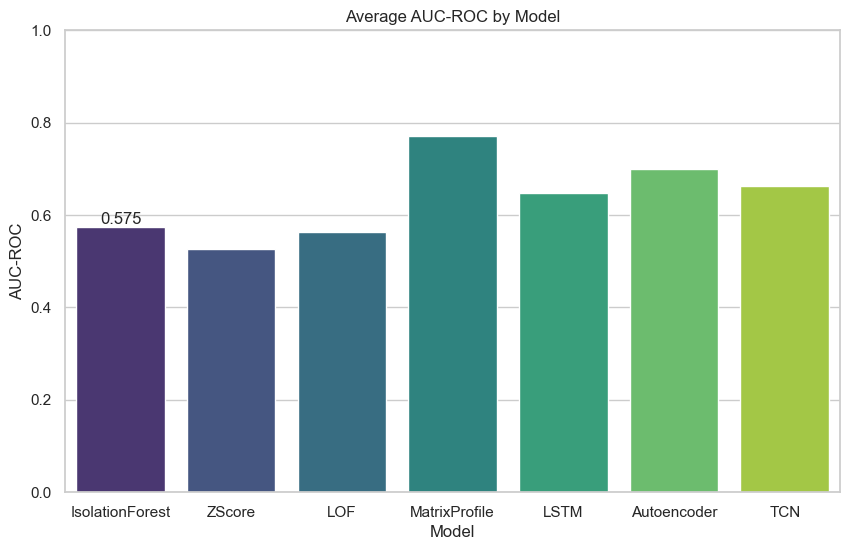

In [9]:
if not df.empty:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x='Model', y='AUC-ROC', palette='viridis', hue='Model', legend=False)
    ax.bar_label(ax.containers[0], fmt='%.3f')
    plt.title('Average AUC-ROC by Model')
    plt.ylim(0, 1.0)
    plt.show()

## 2. PR-AUC Comparison
Comparison of the Area Under the Precision-Recall Curve. This is generally more informative for imbalanced datasets like anomaly detection. Higher is better.

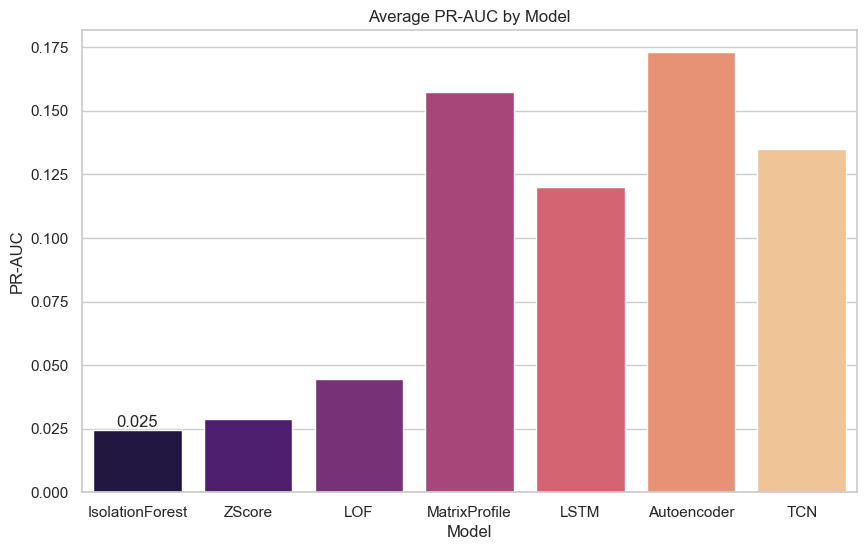

In [10]:
if not df.empty:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x='Model', y='PR-AUC', palette='magma', hue='Model', legend=False)
    ax.bar_label(ax.containers[0], fmt='%.3f')
    plt.title('Average PR-AUC by Model')
    plt.show()

## 3. Top-K Hit Rate Comparison
Comparison of the Top-K Hit Rate. This checks if the model's highest confidence anomalies overlap with the ground truth. Higher is better.

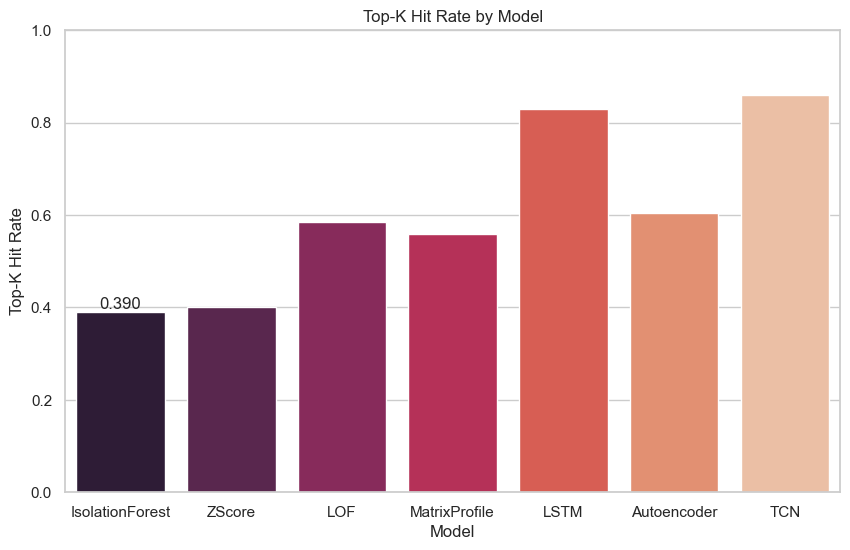

In [11]:
if not df.empty:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x='Model', y='Top-K Hit Rate', hue='Model', palette='rocket', legend=False)
    ax.bar_label(ax.containers[0], fmt='%.3f')
    plt.title('Top-K Hit Rate by Model')
    plt.ylim(0, 1.0)
    plt.show()